## import library and Load Dataset

In [2]:
from libs.MSCTDdataset import MSCTD
from libs.faceExtractor import faceExtractor
# from libs.transforms import Compose,toTensor,resize
from torchvision.transforms import Compose, CenterCrop, ToTensor, Resize,RandomApply,RandomRotation,RandomCrop, Normalize
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pickle 
import torch
import os

In [3]:
# transforms = Compose([ToTensor(), CenterCrop((338,720)), Resize((224,224))]) # CenterCrop((338,720))
transforms = Compose([
        # ToTensor(),
        # RandomApply([
        #         RandomRotation(20),
        #         CenterCrop((540, 720))
        #     ], p=0.2),
        # Resize((640,640)),        
        # Normalize(mean=[0.485, 0.456, 0.406],
        #           std=[0.229, 0.224, 0.225]),
        ])

root_dir = '.'

training_data = MSCTD(
        mode='train', 
        transformer=transforms,
        download=False,
        root_dir=root_dir,
        read_mode="single")

valid_data = MSCTD(
        mode='validation',
        transformer=transforms,
        download=False,
        root_dir=root_dir,
        read_mode="single")

test_data = MSCTD(
        mode='test',
        transformer=transforms,
        download=False,
        root_dir=root_dir,
        read_mode="single")

# A) Face Analysis

## part 1: Face Extraction

In [4]:
face_train = faceExtractor(rootDir=root_dir, mode='train',augmentation=True)
face_train.run(training_data)
print(f"[train] number of images that has no detected face in it :{face_train.fault}")

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
model ignore: /home/user01/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
model ignore: /home/user01/.insightface/models/buffalo_l/2d106det.onnx landmark_2d_106
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/user01/.insightface/models/buffalo_l/det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
model ignore: /home/user01/.insightface/models/buffalo_l/genderage.onnx genderage
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
model ignore: /home/user01/.insightface/models/buffalo_l/w600k_r50.onnx recognition
set det-size: (640, 640)


  0%|          | 0/20240 [00:00<?, ?it/s]/home/user01/.local/lib/python3.10/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
100%|██████████| 20240/20240 [35:41<00:00,  9.45it/s]

[train] number of images that has no detected face in it :2200


In [5]:
face_validation = faceExtractor(rootDir=root_dir, mode='validation',augmentation=False)
face_validation.run(valid_data)
print(f"[validation] number of images that has no detected face in it :{face_validation.fault}")

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
model ignore: /home/user01/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
model ignore: /home/user01/.insightface/models/buffalo_l/2d106det.onnx landmark_2d_106
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/user01/.insightface/models/buffalo_l/det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
model ignore: /home/user01/.insightface/models/buffalo_l/genderage.onnx genderage
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
model ignore: /home/user01/.insightface/models/buffalo_l/w600k_r50.onnx recognition
set det-size: (640, 640)


100%|██████████| 5063/5063 [03:47<00:00, 22.29it/s]

[validation] number of images that has no detected face in it :476


In [6]:
face_test = faceExtractor(rootDir=root_dir, mode='test', augmentation=False)
face_test.run(test_data)
print(f"[test] number of images that has no detected face in it :{face_test.fault}")

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
model ignore: /home/user01/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
model ignore: /home/user01/.insightface/models/buffalo_l/2d106det.onnx landmark_2d_106
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/user01/.insightface/models/buffalo_l/det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
model ignore: /home/user01/.insightface/models/buffalo_l/genderage.onnx genderage
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
model ignore: /home/user01/.insightface/models/buffalo_l/w600k_r50.onnx recognition
set det-size: (640, 640)


100%|██████████| 5067/5067 [03:46<00:00, 22.42it/s]

[test] number of images that has no detected face in it :390


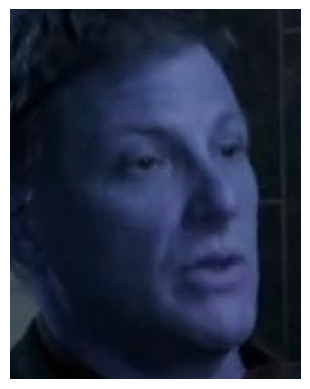

In [7]:
plt.imshow(cv2.imread(f"{root_dir}/faceDataset/originalFace/train/0_0.jpg"));
plt.axis('off');

## part 2: Learning a Network on face 

In [8]:
import faceSentiment

In [9]:
faceSentiment.train(batch_size=128, lr=1.e-3, epochs=20, augmentation=[],\
                     workers=2, num_head=4, Facedataset_path='.',\
                        model_path=os.path.join(root_dir,"checkpoints"))

/home/user01/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(
/home/user01/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Whole train set size: 18256
Validation set size: 4587


  0%|          | 0/20 [00:20<?, ?it/s]

[Epoch 1] Training accuracy: 0.3824. Loss: 2.024. LR 0.001000


  0%|          | 0/20 [00:23<?, ?it/s]

[Epoch 1] Validation accuracy:0.3689. bacc:0.3409. Loss:1.875
best_acc:0.3689


  5%|▌         | 1/20 [00:23<07:35, 23.97s/it]

Model saved in : ./checkpoints/faceDAN.pth


  5%|▌         | 1/20 [00:42<07:35, 23.97s/it]

[Epoch 2] Training accuracy: 0.3932. Loss: 1.836. LR 0.000994


 10%|█         | 2/20 [00:45<06:48, 22.69s/it]

[Epoch 2] Validation accuracy:0.3667. bacc:0.3388. Loss:1.919
best_acc:0.3689


 10%|█         | 2/20 [01:04<06:48, 22.69s/it]

[Epoch 3] Training accuracy: 0.3930. Loss: 1.800. LR 0.000976


 15%|█▌        | 3/20 [01:07<06:17, 22.22s/it]

[Epoch 3] Validation accuracy:0.3630. bacc:0.3348. Loss:1.804
best_acc:0.3689


 15%|█▌        | 3/20 [01:26<06:17, 22.22s/it]

[Epoch 4] Training accuracy: 0.3938. Loss: 1.775. LR 0.000946


 20%|██        | 4/20 [01:29<05:53, 22.11s/it]

[Epoch 4] Validation accuracy:0.3676. bacc:0.3392. Loss:1.779
best_acc:0.3689


 20%|██        | 4/20 [01:48<05:53, 22.11s/it]

[Epoch 5] Training accuracy: 0.3946. Loss: 1.756. LR 0.000905


 25%|██▌       | 5/20 [01:51<05:30, 22.00s/it]

[Epoch 5] Validation accuracy:0.3639. bacc:0.3357. Loss:1.772
best_acc:0.3689


 25%|██▌       | 5/20 [02:10<05:30, 22.00s/it]

[Epoch 6] Training accuracy: 0.3931. Loss: 1.743. LR 0.000855


 25%|██▌       | 5/20 [02:13<05:30, 22.00s/it]

[Epoch 6] Validation accuracy:0.3717. bacc:0.3431. Loss:1.756
best_acc:0.3717


 30%|███       | 6/20 [02:13<05:09, 22.11s/it]

Model saved in : ./checkpoints/faceDAN.pth


 30%|███       | 6/20 [02:32<05:09, 22.11s/it]

[Epoch 7] Training accuracy: 0.3943. Loss: 1.732. LR 0.000796


 35%|███▌      | 7/20 [02:35<04:46, 22.06s/it]

[Epoch 7] Validation accuracy:0.3673. bacc:0.3390. Loss:1.754
best_acc:0.3717


 35%|███▌      | 7/20 [02:54<04:46, 22.06s/it]

[Epoch 8] Training accuracy: 0.3954. Loss: 1.722. LR 0.000730


 35%|███▌      | 7/20 [02:57<04:46, 22.06s/it]

[Epoch 8] Validation accuracy:0.3748. bacc:0.3461. Loss:1.748
best_acc:0.3748


 40%|████      | 8/20 [02:57<04:25, 22.10s/it]

Model saved in : ./checkpoints/faceDAN.pth


 40%|████      | 8/20 [03:16<04:25, 22.10s/it]

[Epoch 9] Training accuracy: 0.3963. Loss: 1.715. LR 0.000658


 45%|████▌     | 9/20 [03:19<04:03, 22.10s/it]

[Epoch 9] Validation accuracy:0.3639. bacc:0.3356. Loss:1.736
best_acc:0.3748


 45%|████▌     | 9/20 [03:38<04:03, 22.10s/it]

[Epoch 10] Training accuracy: 0.3936. Loss: 1.710. LR 0.000582


 50%|█████     | 10/20 [03:41<03:41, 22.14s/it]

[Epoch 10] Validation accuracy:0.3630. bacc:0.3350. Loss:1.742
best_acc:0.3748


 50%|█████     | 10/20 [04:00<03:41, 22.14s/it]

[Epoch 11] Training accuracy: 0.3951. Loss: 1.706. LR 0.000505


 55%|█████▌    | 11/20 [04:04<03:19, 22.17s/it]

[Epoch 11] Validation accuracy:0.3643. bacc:0.3360. Loss:1.732
best_acc:0.3748


 55%|█████▌    | 11/20 [04:23<03:19, 22.17s/it]

[Epoch 12] Training accuracy: 0.3934. Loss: 1.702. LR 0.000428


 60%|██████    | 12/20 [04:26<02:56, 22.11s/it]

[Epoch 12] Validation accuracy:0.3604. bacc:0.3323. Loss:1.729
best_acc:0.3748


 60%|██████    | 12/20 [04:45<02:56, 22.11s/it]

[Epoch 13] Training accuracy: 0.3934. Loss: 1.698. LR 0.000352


 65%|██████▌   | 13/20 [04:48<02:34, 22.10s/it]

[Epoch 13] Validation accuracy:0.3612. bacc:0.3331. Loss:1.729
best_acc:0.3748


 65%|██████▌   | 13/20 [05:07<02:34, 22.10s/it]

[Epoch 14] Training accuracy: 0.3970. Loss: 1.697. LR 0.000280


 70%|███████   | 14/20 [05:10<02:12, 22.11s/it]

[Epoch 14] Validation accuracy:0.3687. bacc:0.3403. Loss:1.725
best_acc:0.3748


 70%|███████   | 14/20 [05:29<02:12, 22.11s/it]

[Epoch 15] Training accuracy: 0.3985. Loss: 1.694. LR 0.000214


 75%|███████▌  | 15/20 [05:32<01:50, 22.16s/it]

[Epoch 15] Validation accuracy:0.3680. bacc:0.3400. Loss:1.732
best_acc:0.3748


 75%|███████▌  | 15/20 [05:51<01:50, 22.16s/it]

[Epoch 16] Training accuracy: 0.3952. Loss: 1.692. LR 0.000155


 80%|████████  | 16/20 [05:55<01:29, 22.27s/it]

[Epoch 16] Validation accuracy:0.3693. bacc:0.3409. Loss:1.732
best_acc:0.3748


 80%|████████  | 16/20 [06:14<01:29, 22.27s/it]

[Epoch 17] Training accuracy: 0.3984. Loss: 1.691. LR 0.000105


 85%|████████▌ | 17/20 [06:17<01:07, 22.34s/it]

[Epoch 17] Validation accuracy:0.3658. bacc:0.3381. Loss:1.727
best_acc:0.3748


 85%|████████▌ | 17/20 [06:36<01:07, 22.34s/it]

[Epoch 18] Training accuracy: 0.4005. Loss: 1.688. LR 0.000064


 90%|█████████ | 18/20 [06:39<00:44, 22.26s/it]

[Epoch 18] Validation accuracy:0.3691. bacc:0.3409. Loss:1.723
best_acc:0.3748


 90%|█████████ | 18/20 [06:58<00:44, 22.26s/it]

[Epoch 19] Training accuracy: 0.4014. Loss: 1.688. LR 0.000034


 95%|█████████▌| 19/20 [07:02<00:22, 22.27s/it]

[Epoch 19] Validation accuracy:0.3695. bacc:0.3416. Loss:1.725
best_acc:0.3748


 95%|█████████▌| 19/20 [07:20<00:22, 22.27s/it]

[Epoch 20] Training accuracy: 0.4006. Loss: 1.687. LR 0.000016


100%|██████████| 20/20 [07:24<00:00, 22.20s/it]

[Epoch 20] Validation accuracy:0.3654. bacc:0.3380. Loss:1.724
best_acc:0.3748


In [10]:
faceSentiment.test(batch_size=128, workers=2, num_head=4, \
                   model_path=os.path.join(root_dir,"checkpoints","faceDAN.pth"), Facedataset_path='.')

Test set size: 4683


/home/user01/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(
/home/user01/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


test accuracy:0.4113. bacc:0.3306


## part 3: Join networks and get final result

In [11]:
import ModelPip

In [12]:
ModelPip.train(batch_size=128, lr=1.e-3, epochs=20, workers=2, num_head=4, MSCTD_path='.',\
                model_path=os.path.join(root_dir,"checkpoints"))

/home/user01/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(
/home/user01/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Whole train set size: 20240
Validation set size: 5063


  0%|          | 0/20 [02:57<?, ?it/s]

[Epoch 1] Training accuracy: 0.3074. Loss: 1.105. LR 0.001000


  5%|▌         | 1/20 [03:20<1:03:27, 200.40s/it]

[Epoch 1] Validation accuracy:0.3597. bacc:0.3328. Loss:1.094
best_acc:0.3597
Model saved in : ./checkpoints/facePipModel.pth


  5%|▌         | 1/20 [06:32<1:03:27, 200.40s/it]

[Epoch 2] Training accuracy: 0.3524. Loss: 1.088. LR 0.000994


 10%|█         | 2/20 [06:57<1:03:02, 210.11s/it]

[Epoch 2] Validation accuracy:0.3540. bacc:0.3270. Loss:1.095
best_acc:0.3597


 10%|█         | 2/20 [09:52<1:03:02, 210.11s/it]

[Epoch 3] Training accuracy: 0.3501. Loss: 1.087. LR 0.000976


 15%|█▌        | 3/20 [10:15<57:57, 204.57s/it]  

[Epoch 3] Validation accuracy:0.3593. bacc:0.3316. Loss:1.096
best_acc:0.3597


 15%|█▌        | 3/20 [13:06<57:57, 204.57s/it]

[Epoch 4] Training accuracy: 0.3513. Loss: 1.087. LR 0.000946


 20%|██        | 4/20 [13:31<53:39, 201.21s/it]

[Epoch 4] Validation accuracy:0.3573. bacc:0.3299. Loss:1.096
best_acc:0.3597


 20%|██        | 4/20 [16:12<53:39, 201.21s/it]

[Epoch 5] Training accuracy: 0.3522. Loss: 1.087. LR 0.000905


 25%|██▌       | 5/20 [16:35<48:43, 194.92s/it]

[Epoch 5] Validation accuracy:0.3573. bacc:0.3300. Loss:1.096
best_acc:0.3597


 25%|██▌       | 5/20 [19:47<48:43, 194.92s/it]

[Epoch 6] Training accuracy: 0.3517. Loss: 1.087. LR 0.000855


 30%|███       | 6/20 [20:12<47:15, 202.52s/it]

[Epoch 6] Validation accuracy:0.3575. bacc:0.3301. Loss:1.096
best_acc:0.3597


 30%|███       | 6/20 [22:52<47:15, 202.52s/it]

[Epoch 7] Training accuracy: 0.3524. Loss: 1.086. LR 0.000796


 35%|███▌      | 7/20 [23:17<42:39, 196.86s/it]

[Epoch 7] Validation accuracy:0.3571. bacc:0.3297. Loss:1.096
best_acc:0.3597


 35%|███▌      | 7/20 [26:07<42:39, 196.86s/it]

[Epoch 8] Training accuracy: 0.3525. Loss: 1.087. LR 0.000730


 40%|████      | 8/20 [26:32<39:16, 196.35s/it]

[Epoch 8] Validation accuracy:0.3578. bacc:0.3303. Loss:1.096
best_acc:0.3597


 40%|████      | 8/20 [29:44<39:16, 196.35s/it]

[Epoch 9] Training accuracy: 0.3517. Loss: 1.086. LR 0.000658


 45%|████▌     | 9/20 [30:09<37:09, 202.64s/it]

[Epoch 9] Validation accuracy:0.3591. bacc:0.3315. Loss:1.097
best_acc:0.3597


 45%|████▌     | 9/20 [32:56<37:09, 202.64s/it]

[Epoch 10] Training accuracy: 0.3543. Loss: 1.086. LR 0.000582


 50%|█████     | 10/20 [33:18<33:06, 198.62s/it]

[Epoch 10] Validation accuracy:0.3575. bacc:0.3301. Loss:1.096
best_acc:0.3597


 50%|█████     | 10/20 [36:18<33:06, 198.62s/it]

[Epoch 11] Training accuracy: 0.3522. Loss: 1.087. LR 0.000505


 55%|█████▌    | 11/20 [36:43<30:05, 200.56s/it]

[Epoch 11] Validation accuracy:0.3562. bacc:0.3289. Loss:1.096
best_acc:0.3597


 55%|█████▌    | 11/20 [39:56<30:05, 200.56s/it]

[Epoch 12] Training accuracy: 0.3540. Loss: 1.087. LR 0.000428


 60%|██████    | 12/20 [40:18<27:18, 204.76s/it]

[Epoch 12] Validation accuracy:0.3578. bacc:0.3303. Loss:1.097
best_acc:0.3597


 60%|██████    | 12/20 [43:22<27:18, 204.76s/it]

[Epoch 13] Training accuracy: 0.3544. Loss: 1.086. LR 0.000352


 65%|██████▌   | 13/20 [43:47<24:01, 205.97s/it]

[Epoch 13] Validation accuracy:0.3575. bacc:0.3301. Loss:1.097
best_acc:0.3597


 65%|██████▌   | 13/20 [46:43<24:01, 205.97s/it]

[Epoch 14] Training accuracy: 0.3542. Loss: 1.087. LR 0.000280


 70%|███████   | 14/20 [47:08<20:28, 204.74s/it]

[Epoch 14] Validation accuracy:0.3562. bacc:0.3289. Loss:1.097
best_acc:0.3597


 70%|███████   | 14/20 [50:11<20:28, 204.74s/it]

[Epoch 15] Training accuracy: 0.3535. Loss: 1.087. LR 0.000214


 75%|███████▌  | 15/20 [50:33<17:04, 204.82s/it]

[Epoch 15] Validation accuracy:0.3575. bacc:0.3301. Loss:1.097
best_acc:0.3597


 75%|███████▌  | 15/20 [53:13<17:04, 204.82s/it]

[Epoch 16] Training accuracy: 0.3541. Loss: 1.086. LR 0.000155


 80%|████████  | 16/20 [53:39<13:16, 199.07s/it]

[Epoch 16] Validation accuracy:0.3564. bacc:0.3291. Loss:1.097
best_acc:0.3597


 80%|████████  | 16/20 [56:52<13:16, 199.07s/it]

[Epoch 17] Training accuracy: 0.3541. Loss: 1.087. LR 0.000105


 85%|████████▌ | 17/20 [57:17<10:14, 204.87s/it]

[Epoch 17] Validation accuracy:0.3575. bacc:0.3301. Loss:1.097
best_acc:0.3597


 85%|████████▌ | 17/20 [59:58<10:14, 204.87s/it]

[Epoch 18] Training accuracy: 0.3549. Loss: 1.087. LR 0.000064


 90%|█████████ | 18/20 [1:00:22<06:37, 198.63s/it]

[Epoch 18] Validation accuracy:0.3573. bacc:0.3299. Loss:1.097
best_acc:0.3597


 90%|█████████ | 18/20 [1:03:01<06:37, 198.63s/it]

[Epoch 19] Training accuracy: 0.3542. Loss: 1.086. LR 0.000034


 95%|█████████▌| 19/20 [1:03:25<03:14, 194.12s/it]

[Epoch 19] Validation accuracy:0.3573. bacc:0.3299. Loss:1.097
best_acc:0.3597


 95%|█████████▌| 19/20 [1:06:33<03:14, 194.12s/it]

[Epoch 20] Training accuracy: 0.3528. Loss: 1.086. LR 0.000016


100%|██████████| 20/20 [1:06:55<00:00, 200.78s/it]

[Epoch 20] Validation accuracy:0.3575. bacc:0.3301. Loss:1.097
best_acc:0.3597


In [13]:
ModelPip.test(batch_size=128, workers=2, num_head=4, Facedataset_path='.',\
              DAN_path=os.path.join(root_dir,"checkpoints","faceDAN.pth"),\
                mixFace_path=os.path.join(root_dir,"checkpoints","facePipModel.pth"))

/home/user01/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(
/home/user01/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Test set size: 5067


100%|██████████| 40/40 [00:24<00:00,  1.62it/s]

test accuracy:0.3983. bacc:0.3361. Loss:2.421
best_acc:0.3983


## part 4: test augmentation

In [14]:
faceSentiment.test(batch_size=128, workers=2, num_head=4, augmentation=['diffeo', 'color', 'filt'],\
                   model_path=os.path.join(root_dir,"checkpoints","faceDAN.pth"), Facedataset_path='.')

Test set size: 54768


/home/user01/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(
/home/user01/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


test accuracy:0.3850. bacc:0.3421


## part 5: train with original and augmentation image

In [16]:
faceSentiment.train(batch_size=128, lr=1.e-3, epochs=20, augmentation=['diffeo', 'color', 'filt'],\
                     workers=2, num_head=4, Facedataset_path='.',\
                        model_path=os.path.join(root_dir,"checkpoints"))

/home/user01/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(
/home/user01/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Whole train set size: 73024
Validation set size: 4587


  0%|          | 0/20 [01:13<?, ?it/s]

[Epoch 1] Training accuracy: 0.3845. Loss: 1.880. LR 0.001000


  0%|          | 0/20 [01:17<?, ?it/s]

[Epoch 1] Validation accuracy:0.3623. bacc:0.3341. Loss:1.788
best_acc:0.3623


  5%|▌         | 1/20 [01:17<24:32, 77.50s/it]

Model saved in : ./checkpoints/faceDAN_aug.pth


  5%|▌         | 1/20 [02:31<24:32, 77.50s/it]

[Epoch 2] Training accuracy: 0.3917. Loss: 1.743. LR 0.000994


 10%|█         | 2/20 [02:35<23:17, 77.62s/it]

[Epoch 2] Validation accuracy:0.3619. bacc:0.3337. Loss:1.741
best_acc:0.3623


 10%|█         | 2/20 [03:49<23:17, 77.62s/it]

[Epoch 3] Training accuracy: 0.3924. Loss: 1.706. LR 0.000976


 15%|█▌        | 3/20 [03:53<22:04, 77.89s/it]

[Epoch 3] Validation accuracy:0.3612. bacc:0.3335. Loss:1.727
best_acc:0.3623


 15%|█▌        | 3/20 [05:07<22:04, 77.89s/it]

[Epoch 4] Training accuracy: 0.3921. Loss: 1.690. LR 0.000946


 20%|██        | 4/20 [05:11<20:45, 77.82s/it]

[Epoch 4] Validation accuracy:0.3617. bacc:0.3335. Loss:1.716
best_acc:0.3623


 20%|██        | 4/20 [06:25<20:45, 77.82s/it]

[Epoch 5] Training accuracy: 0.3922. Loss: 1.682. LR 0.000905


 20%|██        | 4/20 [06:29<20:45, 77.82s/it]

[Epoch 5] Validation accuracy:0.3628. bacc:0.3346. Loss:1.713
best_acc:0.3628


 25%|██▌       | 5/20 [06:29<19:29, 77.98s/it]

Model saved in : ./checkpoints/faceDAN_aug.pth


 25%|██▌       | 5/20 [07:44<19:29, 77.98s/it]

[Epoch 6] Training accuracy: 0.3924. Loss: 1.678. LR 0.000855


 30%|███       | 6/20 [07:47<18:12, 78.06s/it]

[Epoch 6] Validation accuracy:0.3615. bacc:0.3333. Loss:1.712
best_acc:0.3628


 30%|███       | 6/20 [09:02<18:12, 78.06s/it]

[Epoch 7] Training accuracy: 0.3927. Loss: 1.676. LR 0.000796


 35%|███▌      | 7/20 [09:05<16:54, 78.05s/it]

[Epoch 7] Validation accuracy:0.3615. bacc:0.3333. Loss:1.717
best_acc:0.3628


 35%|███▌      | 7/20 [10:20<16:54, 78.05s/it]

[Epoch 8] Training accuracy: 0.3920. Loss: 1.675. LR 0.000730


 40%|████      | 8/20 [10:23<15:36, 78.08s/it]

[Epoch 8] Validation accuracy:0.3617. bacc:0.3336. Loss:1.717
best_acc:0.3628


 40%|████      | 8/20 [11:38<15:36, 78.08s/it]

[Epoch 9] Training accuracy: 0.3923. Loss: 1.675. LR 0.000658


 45%|████▌     | 9/20 [11:41<14:19, 78.11s/it]

[Epoch 9] Validation accuracy:0.3580. bacc:0.3302. Loss:1.734
best_acc:0.3628


 45%|████▌     | 9/20 [12:56<14:19, 78.11s/it]

[Epoch 10] Training accuracy: 0.3921. Loss: 1.674. LR 0.000582


 50%|█████     | 10/20 [12:59<13:00, 78.05s/it]

[Epoch 10] Validation accuracy:0.3619. bacc:0.3337. Loss:1.744
best_acc:0.3628


 50%|█████     | 10/20 [14:14<13:00, 78.05s/it]

[Epoch 11] Training accuracy: 0.3916. Loss: 1.674. LR 0.000505


 55%|█████▌    | 11/20 [14:17<11:42, 78.04s/it]

[Epoch 11] Validation accuracy:0.3591. bacc:0.3324. Loss:1.710
best_acc:0.3628


 55%|█████▌    | 11/20 [15:32<11:42, 78.04s/it]

[Epoch 12] Training accuracy: 0.3925. Loss: 1.674. LR 0.000428


 55%|█████▌    | 11/20 [15:35<11:42, 78.04s/it]

[Epoch 12] Validation accuracy:0.3641. bacc:0.3363. Loss:1.711
best_acc:0.3641


 60%|██████    | 12/20 [15:36<10:25, 78.14s/it]

Model saved in : ./checkpoints/faceDAN_aug.pth


 60%|██████    | 12/20 [16:50<10:25, 78.14s/it]

[Epoch 13] Training accuracy: 0.3923. Loss: 1.674. LR 0.000352


 65%|██████▌   | 13/20 [16:54<09:07, 78.17s/it]

[Epoch 13] Validation accuracy:0.3615. bacc:0.3334. Loss:1.729
best_acc:0.3641


 65%|██████▌   | 13/20 [18:09<09:07, 78.17s/it]

[Epoch 14] Training accuracy: 0.3922. Loss: 1.674. LR 0.000280


 70%|███████   | 14/20 [18:12<07:49, 78.18s/it]

[Epoch 14] Validation accuracy:0.3617. bacc:0.3336. Loss:1.738
best_acc:0.3641


 70%|███████   | 14/20 [19:27<07:49, 78.18s/it]

[Epoch 15] Training accuracy: 0.3932. Loss: 1.674. LR 0.000214


 75%|███████▌  | 15/20 [19:30<06:30, 78.20s/it]

[Epoch 15] Validation accuracy:0.3612. bacc:0.3331. Loss:1.791
best_acc:0.3641


 75%|███████▌  | 15/20 [20:45<06:30, 78.20s/it]

[Epoch 16] Training accuracy: 0.3946. Loss: 1.672. LR 0.000155


 75%|███████▌  | 15/20 [20:48<06:30, 78.20s/it]

[Epoch 16] Validation accuracy:0.3663. bacc:0.3384. Loss:1.751
best_acc:0.3663


 80%|████████  | 16/20 [20:49<05:12, 78.21s/it]

Model saved in : ./checkpoints/faceDAN_aug.pth


 80%|████████  | 16/20 [22:03<05:12, 78.21s/it]

[Epoch 17] Training accuracy: 0.3951. Loss: 1.672. LR 0.000105


 85%|████████▌ | 17/20 [22:07<03:54, 78.15s/it]

[Epoch 17] Validation accuracy:0.3615. bacc:0.3334. Loss:1.768
best_acc:0.3663


 85%|████████▌ | 17/20 [23:21<03:54, 78.15s/it]

[Epoch 18] Training accuracy: 0.3975. Loss: 1.671. LR 0.000064


 85%|████████▌ | 17/20 [23:25<03:54, 78.15s/it]

[Epoch 18] Validation accuracy:0.3713. bacc:0.3430. Loss:1.756
best_acc:0.3713


 90%|█████████ | 18/20 [23:25<02:36, 78.21s/it]

Model saved in : ./checkpoints/faceDAN_aug.pth


 90%|█████████ | 18/20 [24:40<02:36, 78.21s/it]

[Epoch 19] Training accuracy: 0.4003. Loss: 1.669. LR 0.000034


 90%|█████████ | 18/20 [24:43<02:36, 78.21s/it]

[Epoch 19] Validation accuracy:0.3767. bacc:0.3484. Loss:1.751
best_acc:0.3767


 95%|█████████▌| 19/20 [24:43<01:18, 78.25s/it]

Model saved in : ./checkpoints/faceDAN_aug.pth


 95%|█████████▌| 19/20 [25:58<01:18, 78.25s/it]

[Epoch 20] Training accuracy: 0.3995. Loss: 1.669. LR 0.000016


100%|██████████| 20/20 [26:01<00:00, 78.10s/it]

[Epoch 20] Validation accuracy:0.3695. bacc:0.3416. Loss:1.750
best_acc:0.3767


In [17]:
ModelPip.test(batch_size=128, workers=2, num_head=4, Facedataset_path='.',\
              DAN_path=os.path.join(root_dir,"checkpoints","faceDAN_aug.pth"),\
                mixFace_path=os.path.join(root_dir,"checkpoints","facePipModel.pth"))

/home/user01/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(
/home/user01/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Test set size: 5067


100%|██████████| 40/40 [00:25<00:00,  1.59it/s]

test accuracy:0.3981. bacc:0.3417. Loss:2.540
best_acc:0.3981


# B) Sentiment anlysis with image's feature

In [18]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torchvision.models import resnet50, ResNet50_Weights
from torchsummary import summary
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [19]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cuda


In [20]:
batch_size = 128
train_dataloader = DataLoader(training_data, batch_size=batch_size, shuffle=True)
valid_dataloader = DataLoader(valid_data, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=batch_size, shuffle=True)

In [21]:
weights = ResNet50_Weights.DEFAULT
model = resnet50(weights=weights)
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [22]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.linear_relu_stack = nn.Sequential(

            nn.Linear(2048, 256),
            nn.ReLU(),
            nn.Dropout(0.5),

            nn.Linear(256, 64),
            nn.ReLU(),
            nn.Dropout(0.5),
            
            nn.Linear(64, 16),
            nn.ReLU(),
            nn.Dropout(0.5),
            
            nn.Linear(16, 3),
        )
        # self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        logits = self.linear_relu_stack(x)
        # y = self.softmax(logits)
        return logits

In [23]:
# model.fc = nn.Linear(2048,3)
model.fc = MLP()


for param in model.parameters():
    param.requires_grad = False

for name, param in model.named_parameters():
    if 'layer4' in name:
        param.requires_grad = True
    if 'fc' in name:
        param.requires_grad = True

for name, param in model.named_parameters():
    print(name, param.requires_grad)

conv1.weight False
bn1.weight False
bn1.bias False
layer1.0.conv1.weight False
layer1.0.bn1.weight False
layer1.0.bn1.bias False
layer1.0.conv2.weight False
layer1.0.bn2.weight False
layer1.0.bn2.bias False
layer1.0.conv3.weight False
layer1.0.bn3.weight False
layer1.0.bn3.bias False
layer1.0.downsample.0.weight False
layer1.0.downsample.1.weight False
layer1.0.downsample.1.bias False
layer1.1.conv1.weight False
layer1.1.bn1.weight False
layer1.1.bn1.bias False
layer1.1.conv2.weight False
layer1.1.bn2.weight False
layer1.1.bn2.bias False
layer1.1.conv3.weight False
layer1.1.bn3.weight False
layer1.1.bn3.bias False
layer1.2.conv1.weight False
layer1.2.bn1.weight False
layer1.2.bn1.bias False
layer1.2.conv2.weight False
layer1.2.bn2.weight False
layer1.2.bn2.bias False
layer1.2.conv3.weight False
layer1.2.bn3.weight False
layer1.2.bn3.bias False
layer2.0.conv1.weight False
layer2.0.bn1.weight False
layer2.0.bn1.bias False
layer2.0.conv2.weight False
layer2.0.bn2.weight False
layer2.0.bn2

In [24]:
model.to(device)
summary(model,(3,224,224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]           4,096
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]          16,384
      BatchNorm2d-12          [-1, 256, 56, 56]             512
           Conv2d-13          [-1, 256, 56, 56]          16,384
      BatchNorm2d-14          [-1, 256,

In [25]:
learning_rate = 1e-3

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
from tqdm import tqdm
def train_loop(epoch, dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    avgLoss = 0
    avgCorrect = 0
    model.train()
    # for batch, (X, text, y, idx) in tqdm(enumerate(dataloader)):
    with tqdm(dataloader, unit="batch") as tepoch:
        for  (X, text, y, idx) in tepoch:
            tepoch.set_description(f"Epoch {epoch+1}")
            # Compute prediction and loss
            # X = torch.permute(X[0],(0,3,1,2)).float()
            size_batch = X[0].shape[0]
            noise = torch.randn(X[0].shape).to(device)
            X = X[0].to(device)
            X_noise = X[0] + noise
            X = X.to(device)
            y = torch.squeeze(torch.Tensor(np.array(y).astype(int)).to(torch.long))
            y = y.to(device)
            pred = model(X)
            loss = loss_fn(pred, y)
            avgLoss += loss.item()
            correct = (pred.argmax(1) == y).type(torch.float).sum().item()
            avgCorrect += correct
            
            # Backpropagation
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
    
            correct = correct / size_batch
            
            tepoch.set_postfix(batch_loss=loss.item(), batch_accuracy=100. * correct)
            
    avgLoss /= size
    avgCorrect /= size
    print(f" -Training Accuracy (Avg) = {(100*avgCorrect):>0.1f}%, Avg loss = {avgLoss:>8f} \n")
    return avgCorrect, avgLoss

def test_loop(dataloader, model, loss_fn, error):
    size = len(dataloader.dataset)
    avgLoss = 0
    avgCorrect = 0
    model.eval()
    with torch.no_grad():
        for (X, text, y, idx) in dataloader:
            # Compute prediction and loss
            X = X[0].to(device)
            y = torch.squeeze(torch.Tensor(np.array(y).astype(int)).to(torch.long))
            y = y.to(device)
            pred = model(X)
            avgLoss += loss_fn(pred, y).item()
            avgCorrect += (pred.argmax(1) == y).type(torch.float).sum().item()

    avgLoss /= size
    avgCorrect /= size
    print(f" -{error} : Accuracy = {(100*avgCorrect):>0.1f}%, Avg loss = {avgLoss:>8f} \n")
    return avgCorrect, avgLoss

In [ ]:
# from torch.utils.tensorboard import SummaryWriter
# writer = SummaryWriter(log_dir='MLP_Board')

epochs = 5
for e in range(epochs):
    print(f" Epoch {e+1} -------------------------------")
    trainAcc, trainLoss = train_loop(e, train_dataloader, model, loss_fn, optimizer)
    # writer.add_scalar('Accuracy/train', trainAcc, e)
    # writer.add_scalar('Loss/train', trainLoss, e)

    valAcc, valLoss = test_loop(valid_dataloader, model, loss_fn, 'Validation')
    # writer.add_scalar('Accuracy/validation', valAcc, e)
    # writer.add_scalar('Loss/validation', valLoss, e)
    
print("Done!")

Epoch 1
-------------------------------


Epoch 1: 100%|██████████| 159/159 [03:48<00:00,  1.44s/batch, batch_accuracy=50, batch_loss=1.06]  


 -Training Accuracy (Avg) = 38.7%, Avg loss = 0.008568 

 -Validation : Accuracy = 36.3%, Avg loss = 0.008659 

Epoch 2
-------------------------------


Epoch 2: 100%|██████████| 159/159 [04:04<00:00,  1.54s/batch, batch_accuracy=56.2, batch_loss=1.04]


 -Training Accuracy (Avg) = 39.6%, Avg loss = 0.008523 



KeyboardInterrupt: 

In [ ]:
test_loop(test_dataloader, model, loss_fn, 'Test');

 -Test Error: Accuracy = 37.8%, Avg loss = 0.004347 



In [ ]:
y_pred = []
y_true = []

with torch.no_grad():
    for (X, temp1, y, temp2)  in test_dataloader:
        # X = torch.permute(X[0],(0,3,1,2)).float()
        X = X[0].to(device)
        y = torch.squeeze(torch.Tensor(np.array(y).astype(int)).to(torch.long))
        y = y.to(device)
        pred = model(X)
        output = pred.argmax(1).cpu().numpy()
        y_pred.extend(output)
        label = y.cpu().numpy()
        y_true.extend(label)

In [ ]:
print(classification_report(y_true=y_true, y_pred=y_pred, target_names=['neutral','negative','positive']))

              precision    recall  f1-score   support

     neutral       0.28      0.42      0.34      1298
    negative       0.44      0.63      0.52      2163
    positive       0.00      0.00      0.00      1606

    accuracy                           0.38      5067
   macro avg       0.24      0.35      0.29      5067
weighted avg       0.26      0.38      0.31      5067



/home/user01/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/user01/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/user01/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


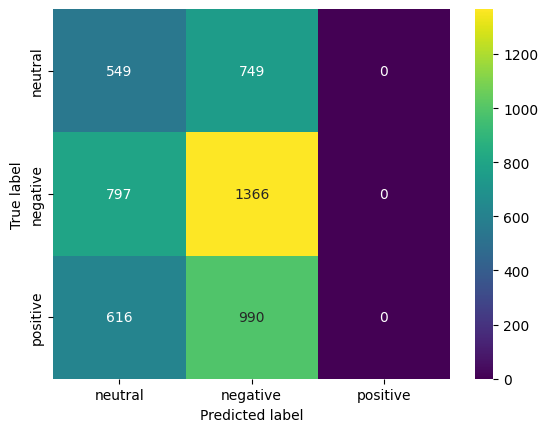

In [ ]:
cf_matrix = confusion_matrix(y_true=y_true, y_pred=y_pred)

sb.heatmap(cf_matrix,
           annot=True,
           fmt='d',
           cmap='viridis',
           xticklabels=['neutral','negative','positive'],
           yticklabels=['neutral','negative','positive'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [ ]:
torch.save(model.state_dict(), 'phase1_part2_model.pth')

> We get better accuracy because the model uses whole images instead of faces.

# C) join